# Random Notebook

In [1]:
%matplotlib inline

import bs4
import datetime
import glob
import ipywidgets
from itertools import product
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import tensorflow as tf


from scipy import stats

## Global parameters and variables

In [2]:
tf.enable_eager_execution()
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Tensroflow Function Testing and Debugging

In [4]:
tf.math.log([[10., 10.]])

<tf.Tensor: id=6, shape=(1, 2), dtype=float32, numpy=array([[2.3025851, 2.3025851]], dtype=float32)>

In [93]:
a = [[1., 2., 3., 4., 5., 6.]]

In [94]:
x = tf.math.log(a)
x

<tf.Tensor: id=145, shape=(1, 6), dtype=float32, numpy=
array([[0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595]],
      dtype=float32)>

In [97]:
y = tf.math.softmax(x)
y*21

<tf.Tensor: id=157, shape=(1, 6), dtype=float32, numpy=
array([[1.       , 2.       , 3.0000002, 4.       , 5.       , 6.0000005]],
      dtype=float32)>

## Udacity Course

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve

In [5]:
data = pd.read_csv('./data/udacity.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

In [6]:
# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

C:\Program Files\Python 3.6.3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files\Python 3.6.3\lib\site-packages\sklearn\model_selection\_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 61 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


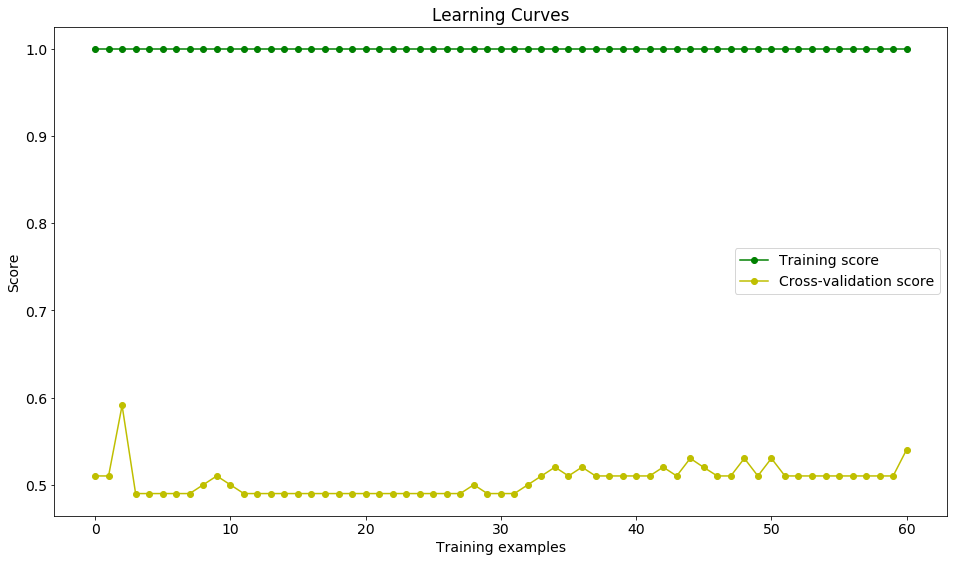

In [14]:
cf1 = LogisticRegression(solver='lbfgs')
cf1.fit(X, y)
draw_learning_curves(X, y,estimator, 100)

C:\Program Files\Python 3.6.3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files\Python 3.6.3\lib\site-packages\sklearn\model_selection\_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 61 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


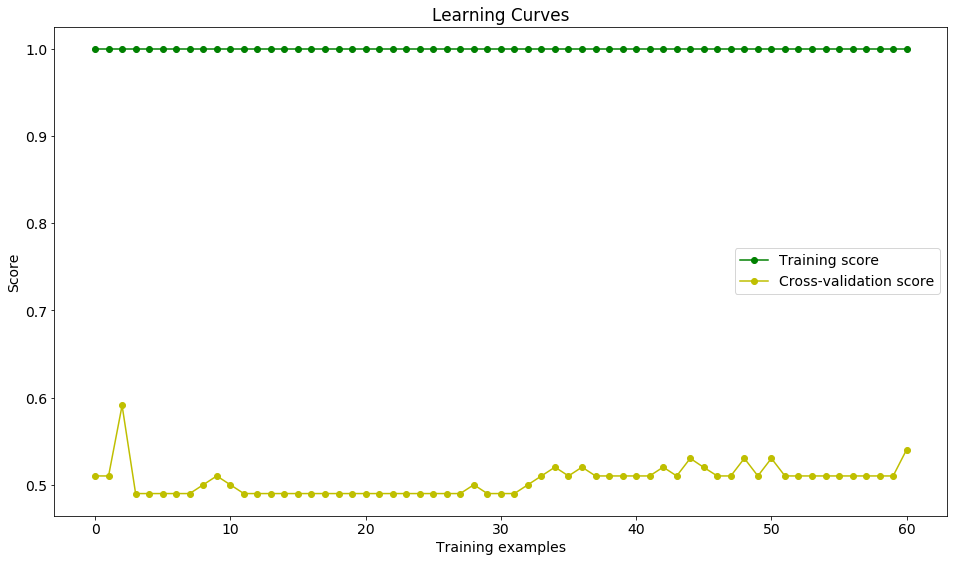

In [15]:
cf2 = GradientBoostingClassifier()
cf2.fit(X, y)
draw_learning_curves(X, y,estimator, 100)

C:\Program Files\Python 3.6.3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files\Python 3.6.3\lib\site-packages\sklearn\model_selection\_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 61 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


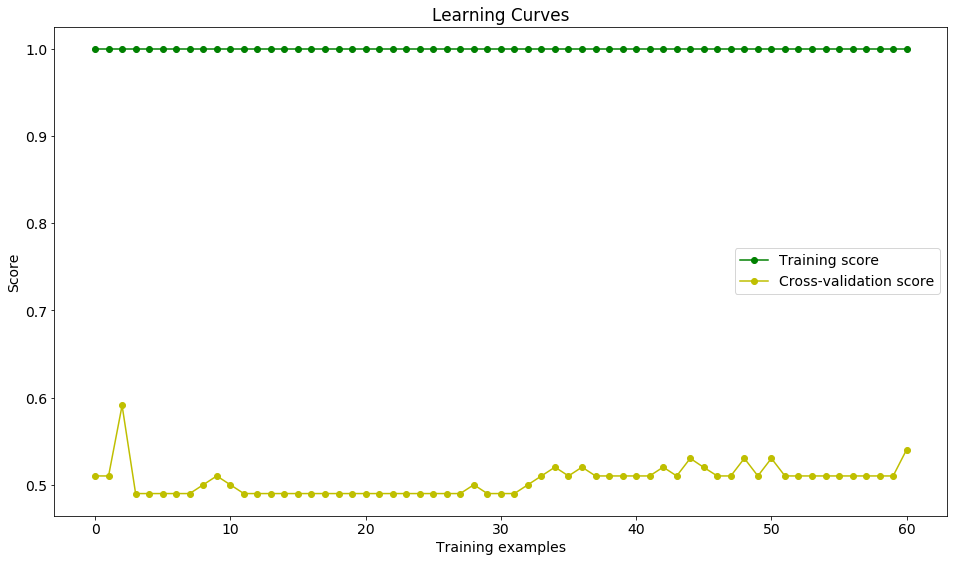

In [16]:
cf3 = SVC(kernel='rbf', gamma=1000)
cf3.fit(X, y)
draw_learning_curves(X, y,estimator, 100)

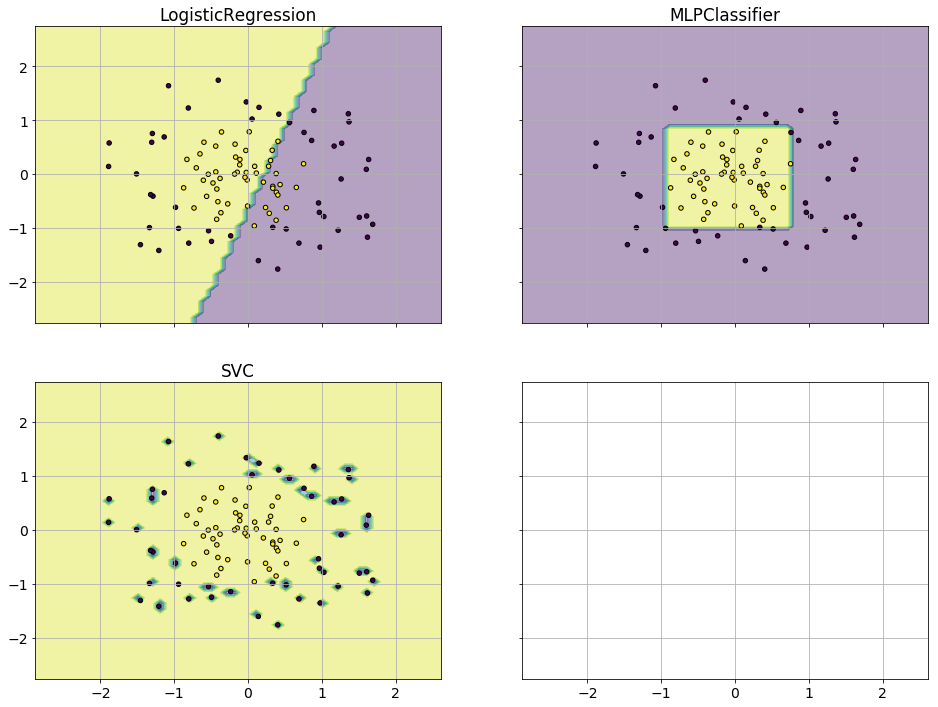

In [17]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16, 12))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [cf1, cf2, cf3],
                        ['LogisticRegression', 'MLPClassifier',
                         'SVC', 'DecisionTreeClassifier']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [1]:
a = b = c = 0

In [2]:
a += 1

In [3]:
a

1

In [4]:
b

0

In [5]:
c

0